In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv


In [3]:
!pip install git+https://github.com/nsh87/regressors.git@3a39e6aeb09953ccaeabec346f2eef324b7fcab9

  Cloning https://github.com/nsh87/regressors.git (to revision 3a39e6aeb09953ccaeabec346f2eef324b7fcab9) to /tmp/pip-req-build-dv175ghs
  Running command git clone --filter=blob:none --quiet https://github.com/nsh87/regressors.git /tmp/pip-req-build-dv175ghs
  Running command git rev-parse -q --verify 'sha^3a39e6aeb09953ccaeabec346f2eef324b7fcab9'
  Running command git fetch -q https://github.com/nsh87/regressors.git 3a39e6aeb09953ccaeabec346f2eef324b7fcab9
  Running command git checkout -q 3a39e6aeb09953ccaeabec346f2eef324b7fcab9
  Resolved https://github.com/nsh87/regressors.git to commit 3a39e6aeb09953ccaeabec346f2eef324b7fcab9
  Preparing metadata (setup.py) ... done


In [4]:
import numpy as np 
import pandas as pd 
import os
import statsmodels.formula.api as sm
import statsmodels.sandbox.tools.cross_val as cross_val
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model as lm
from regressors import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict, LeaveOneOut

print(os.listdir("../input"))

['video-game-sales-with-ratings']


In [8]:
#Interactive Terms: Statsmodel
d = pd.read_csv("/kaggle/input/insurance/insurance.csv")
d['is_smoker'] = d['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
d['is_male'] = d['sex'].apply(lambda x: 1 if x == 'male' else 0)
d

,age,sex,bmi,children,smoker,region,charges,is_smoker,is_male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [9]:
main = sm.ols(formula="charges ~ age*bmi*children",data=d).fit()
print(main.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     26.06
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.37e-33
Time:                        12:07:24   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.880e+04
Df Residuals:                    1330   BIC:                         2.884e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9928.4841   5675.315  

In [10]:
inter = sm.ols(formula="charges ~ age*smoker",data=d).fit()
print(inter.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1153.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:07:41   Log-Likelihood:                -13622.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1334   BIC:                         2.727e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2091.4206    582.56

In [11]:
inter = sm.ols(formula="charges ~ age*bmi",data=d).fit()
print(inter.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     59.18
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           6.45e-36
Time:                        12:08:03   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.880e+04
Df Residuals:                    1334   BIC:                         2.882e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9162.5553   4633.918     -1.977      0.0

In [12]:
inter = sm.ols(formula="charges ~ smoker*bmi",data=d).fit()
print(inter.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1277.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:08:30   Log-Likelihood:                -13572.
No. Observations:                1338   AIC:                         2.715e+04
Df Residuals:                    1334   BIC:                         2.717e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5879.4241    976.86

In [13]:
inter = sm.ols(formula="charges ~ smoker*children*bmi",data=d).fit()
print(inter.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     557.9
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:09:23   Log-Likelihood:                -13561.
No. Observations:                1338   AIC:                         2.714e+04
Df Residuals:                    1330   BIC:                         2.718e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [14]:
inter = sm.ols(formula="charges ~ smoker*children*bmi",data=d).fit()
print(inter.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     557.9
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:09:42   Log-Likelihood:                -13561.
No. Observations:                1338   AIC:                         2.714e+04
Df Residuals:                    1330   BIC:                         2.718e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

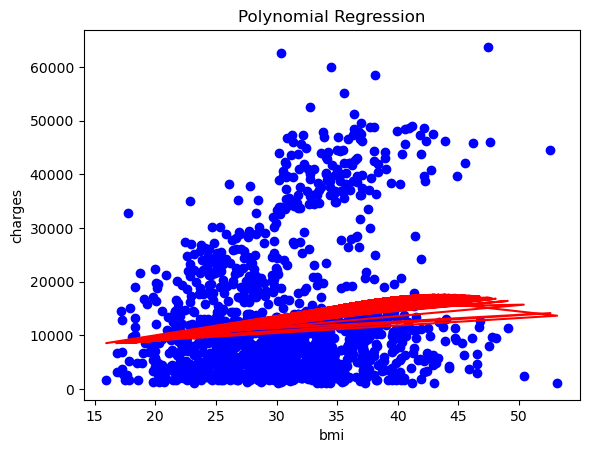

In [15]:
import matplotlib.pyplot as plt
inputDF = d[['bmi']]
outputDF = d[['charges']]

lin = LinearRegression()
poly_features = PolynomialFeatures(degree=3)
inputDF_poly = poly_features.fit_transform(inputDF)
lin.fit(inputDF_poly, outputDF)

#Scatter Plot - Polynomial Regression
plt.scatter(inputDF, outputDF, color = 'blue') 
plt.plot(inputDF, lin.predict(inputDF_poly), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('bmi') 
plt.ylabel('charges') 
plt.show() 

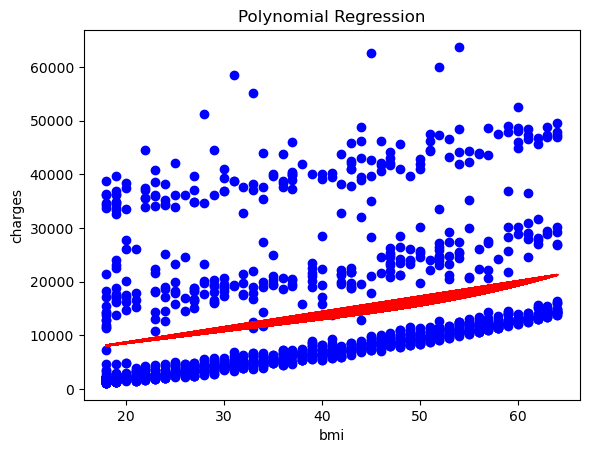

In [16]:
inputDF = d[['age']]
outputDF = d[['charges']]

lin = LinearRegression()
poly_features = PolynomialFeatures(degree=3)
inputDF_poly = poly_features.fit_transform(inputDF)
lin.fit(inputDF_poly, outputDF)

#Scatter Plot - Polynomial Regression
plt.scatter(inputDF, outputDF, color = 'blue') 
plt.plot(inputDF, lin.predict(inputDF_poly), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('bmi') 
plt.ylabel('charges') 
plt.show() 

## Forward Model Selection

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

d['smoker_age_bmi_interaction'] = d['age'] * d['bmi'] * d['is_smoker']
d['sex_age_bmi_interaction'] = d['age'] * d['bmi'] * d['is_male']
d['age_bmi_children_interaction'] = d['age'] * d['bmi'] * d['children']

print(d.head())
inputDF = d[['age', 'bmi', 'children','is_smoker', 'is_male', 'smoker_age_bmi_interaction', 'sex_age_bmi_interaction','age_bmi_children_interaction']]
outputDF = d[["charges"]]

model = sfs(LinearRegression(),k_features=5,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(inputDF,outputDF)
print(model.k_feature_idx_)
print(model.k_feature_names_)

   age     sex     bmi  children smoker     region      charges  is_smoker  \
0   19  female  27.900         0    yes  southwest  16884.92400          1   
1   18    male  33.770         1     no  southeast   1725.55230          0   
2   28    male  33.000         3     no  southeast   4449.46200          0   
3   33    male  22.705         0     no  northwest  21984.47061          0   
4   32    male  28.880         0     no  northwest   3866.85520          0   

   is_male  smoker_age_bmi_interaction  sex_age_bmi_interaction  \
0        0                       530.1                    0.000   
1        1                         0.0                  607.860   
2        1                         0.0                  924.000   
3        1                         0.0                  749.265   
4        1                         0.0                  924.160   

   age_bmi_children_interaction  
0                          0.00  
1                        607.86  
2                       27

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.7s finished

[2023-04-17 12:10:52] Features: 1/5 -- score: 0.7010671740789409[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2023-04-17 12:10:52] Features: 2/5 -- score: 0.7320827404377147[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2023-04-17 12:10:52] Features: 3/5 -- score: 0.7542558436090294[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


(0, 1, 2, 3, 5)
('age', 'bmi', 'children', 'is_smoker', 'smoker_age_bmi_interaction')


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2023-04-17 12:10:52] Features: 4/5 -- score: 0.7696473123703[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2023-04-17 12:10:52] Features: 5/5 -- score: 0.7713944795812913

In [18]:
inputDF = d[['age', 'bmi', 'children','is_smoker', 'is_male', 'smoker_age_bmi_interaction', 'sex_age_bmi_interaction','age_bmi_children_interaction']]
outputDF = d[["charges"]]

backwardModel = sfs(LinearRegression(),k_features=5,forward=False,verbose=2,cv=5,n_jobs=-1,scoring='r2')
backwardModel.fit(inputDF,outputDF)
print(model.k_feature_idx_)
print(model.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-04-17 12:11:06] Features: 7/5 -- score: 0.7712688137460362[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2023-04-17 12:11:06] Features: 6/5 -- score: 0.7713258431822182[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


(0, 1, 2, 3, 5)
('age', 'bmi', 'children', 'is_smoker', 'smoker_age_bmi_interaction')


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2023-04-17 12:11:07] Features: 5/5 -- score: 0.7713944795812913

In [19]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
inputDF = d[['age', 'bmi', 'children', 'is_smoker', 'smoker_age_bmi_interaction']]
outputDF = d[['charges']]
model = LinearRegression()
loocv = LeaveOneOut()
rmse = np.sqrt(-cross_val_score(model, inputDF, outputDF, scoring="neg_mean_squared_error", cv = loocv))
print(rmse.mean())
predictions = cross_val_predict(model, inputDF, outputDF, cv=loocv)

3814.1647428842734


In [20]:
inputDF = d[['age', 'bmi', 'children', 'is_smoker', 'smoker_age_bmi_interaction']]
outputDF = d[['charges']]
model = LinearRegression()
kf = KFold(5, shuffle=True, random_state=42).get_n_splits(inputDF)
rmse = np.sqrt(-cross_val_score(model, inputDF, outputDF, scoring="neg_mean_squared_error", cv = kf))
print(rmse.mean())

5773.586118792884


In [21]:
inputDF = d[['age', 'bmi', 'children', 'is_smoker', 'smoker_age_bmi_interaction']]
outputDF = d[['charges']]
model = LinearRegression()
kf = KFold(10, shuffle=True, random_state=42).get_n_splits(inputDF)
rmse = np.sqrt(-cross_val_score(model, inputDF, outputDF, scoring="neg_mean_squared_error", cv = kf))
print(rmse.mean())

5759.031558491178


# Final Selection

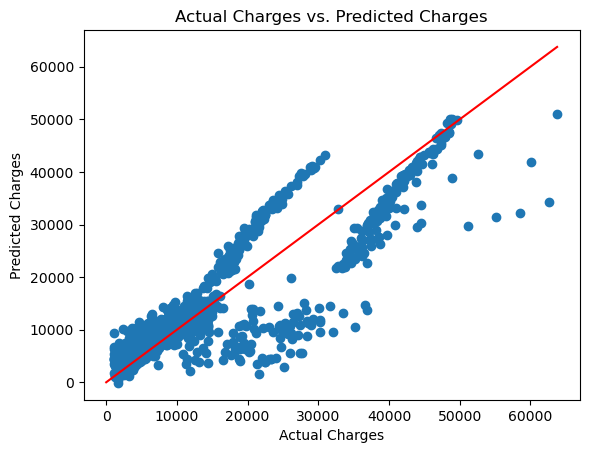

In [22]:
plt.scatter(outputDF, predictions)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs. Predicted Charges')
max_val = outputDF['charges'].max()
plt.plot([0, max_val], [0, max_val], color='red')
plt.show()